Victor Ramirez
David Butts
Shaipeng Zhang

Please read though the entire project before starting!

# Homework 4 - Predicting the 2016 election by State

In this homework we are going to build an model to predict the 2016 presidential election by state. This homework is Due at 11:59pm on Friday November 4th before the election on Tuesday November 8th.  On Thursday November 10th groups will present their models and compare the predictions to the commonly accepted exit poll results (true election results are not complete until December). 

Since many of the models may make the same overall predictions, we will determine the accuracy of your prediction by each state.  

Although there will be prestige in making the most accurate predictions, your model will be graded more on your argument for the changes you make to the model and how well you implement these changes. 

### Project Components and Grading,

1. (10 points) Use git to manage your project
1. (20 points) Written description and support argument for your chosen model modifications (including references)
1. (10 points) Outline of your model code
1. (10 points) Final visualization of your predicted electorate results using red/blue state map 
1. (10 points) Final Results saved in the provided format.
1. (10 points) Final bar chart visualization of popular vote as compared to electorate vote
1. (10 points) Testing Code
1. (20 points) Final Presentation of model

As in the previous homework, you will be expected to split the work evenly between your teammates.  


----
# (10 points) Use git to manage your projects
As in the previous homeworks, you will be expected to split the work evenly between your teammates.  
    * Create a private repository in github or gitlab and include your instructor as a member.  
    * Make sure you include a copy of this notebook in the top directory of your project folder.
    * Have every person in the group make commitments. 
    * This is how you will turn in your final project. 

**Question 1**: What is the command the instructors should use to download your project?

git pull gitlab.msu.edu:buttsdav/election_model

----
# (20 points) Written description and support argument for your chosen model modifications (including references)

As a group you will decide how to modify the simple election model we did in class.  You will be expected to download and incorporate additional data or make a significant change to the calculation. Please refer to the following <a href="http://fivethirtyeight.com/"> fivethirtyeight.com </a> blog post:


http://fivethirtyeight.com/features/a-users-guide-to-fivethirtyeights-2016-general-election-forecast/

Part of this description is a support argument about why you think this new model will be better than the simple model we did in class.  

**Question 2**: What modifications did your group decide to make to the model. Please use a detailed description and include links for references:

We take all the polling data from 538, and we have made a weighting function to weight all of the polls. We then average the weighted polling data and assign votes to each of the states from that.

**Question 3**: Why do you think your model will be a better predictor than the simple prediction we did in class?  Jjustify your answer. 

The inclass model just took the data at face value and was missing some data, since we are weighting and averageing polls to get a better sense of how the votes are distributed and we are not missing data we feel we will have a better model/prediction

**Question 4**: It is assumed that additional data will be needed to complete your election model.  Where are you planning to get this data and how will the data be imported into Jupyter notebooks? If this assumption is false, explain the significant change you are making to the model.

We are grabbing all of our data from 538 by scrapping the site and taking the polling data from them.

----
# (10 points) Outline of your model code

Write a short outline of your model code.  This should let the instructors understand the basic, high level structure of your program? i.e. what classes (if any) are you using and what order are you running your high level functions. If you do not provide enough detail the instructors can not give you partial credit.  However, if you provide too much detail it will be difficult for the instructors understand the big picture.  

Something like Seudo-code or a flow-chart would be appropriate here. 

Our code takes in polling data that we scrap from the internet. Our model will take that polling data and we have a function to put weights on it based on information that it comes with about itself. Then the weighted data is passed to the statemaps function. Statemap takes in the polling data and will see how many votes for each canidate the state has, and assign the state the coorisponding color(Red for Trump and Blue for Hillary). It can do this because we have previously set up statemaps to be able to select individual states from a picture of a map of the United States for color assignment using binary image morphology. Statemap will display the color coded map and show the winner in text. We also have a module bars which works in the exact same way as statemap but instead returns a bar for the popular and electoral vote.

----
# (10 points) Final visualization of your predicted electorate results using red/blue state map

Create a red/blue state map (like the one we did in class). Put your code below for running your model and creating the final visualization.

You are encouraged (not required) to import your code from an external python file and just put a few lines of code that calls your model. 

Setting to internal display


/opt/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


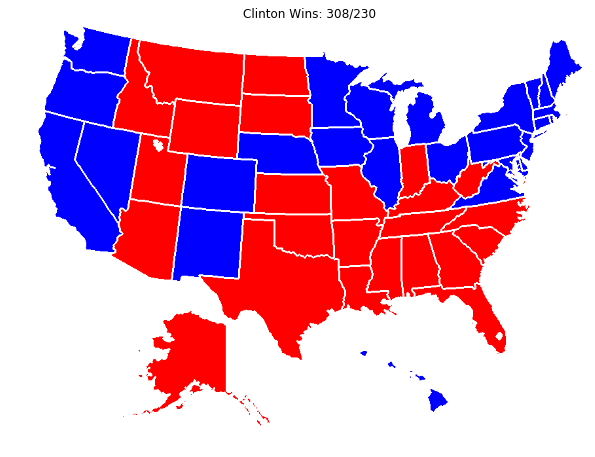

In [1]:
%matplotlib inline
import statemap
import numpy as np

file = 'http://projects.fivethirtyeight.com/general-model/president_general_polls_2016.csv'

e = statemap.election(file)

----
# (10 points) Final Results saved in the provided format.

Save your final inputs and output predictions to appropriate files.  

**For input files:** If you download any data from a changing website, make sure you save a copy of that data in a local file checked into your repository. Make sure you include code in your model to read these files and use them in case the changing website is different or disabled during grading.  

**For Visualizations:** For each of your predictions (only one is required), save a copy of your final visualizations (both red/blue state maps and bar graphs) as image files and save them in your git repository. 

**For prediction data:** For each of your predictions (only one is required), create a python dictionary with the state abbreviations as the key and a tuple as the values.  The tuples should be in the alphabetical formate predictions for the candidates as numbers between zero and one (representing the percent of the popular vote in the state).  For example:


In [2]:
#print(statemap.election.poll())
import pickle
filename='prediction1.p'
prediction = {}
p = statemap.election.poll(file)
for s in p:
    prediction[s] = p[s][0:2]

pickle.dump( prediction, open( filename, "wb" ) )


#prediction format
#prediction = {
#    'WA':(0.50,0.48),
#    'OR':(0.60,0.44),
#    'CA':(0.80,0.02),
    #Note, missing states are allowed.  
#}

Your instructors can then read the file using their own code in a format similar to the following:

In [3]:
group_prediction = pickle.load( open( filename, "rb" ) )
print(group_prediction)

{'PA': (51.724137931034484, 48.275862068965516), 'MS': (24.8475393561197, 75.152460643880303), 'KY': (42.591390871728315, 57.408609128271678), 'MN': (53.029537995455698, 46.970462004544309), 'TX': (43.425460636515915, 56.574539363484092), 'NJ': (57.004653441097219, 42.995346558902767), 'WI': (55.952380952380956, 44.047619047619051), 'SD': (36.288837037946706, 63.711162962053301), 'CT': (60.286326231540976, 39.713673768459024), 'WY': (35.027888446215137, 64.972111553784856), 'AK': (47.216274089935766, 52.783725910064241), 'ND': (33.871463714637144, 66.128536285362856), 'NY': (62.650602409638559, 37.349397590361441), 'UT': (46.634349030470915, 53.365650969529085), 'CO': (54.383044829116741, 45.616955170883266), 'VT': (86.355113226597439, 13.64488677340257), 'NM': (55.190449118817519, 44.809550881182489), 'ME': (53.738041809377577, 46.261958190622416), 'ID': (36.705450091855482, 63.294549908144525), 'MA': (70.06821662258109, 29.93178337741891), 'FL': (49.438202247191015, 50.56179775280899

----
# (10 points) Final bar chart visualization of popular vote as compared to electorate vote

Make a second visualization of your results using a two color bar chart similar to the bar chart shown at the top of the http://projects.fivethirtyeight.com/2016-election-forecast website.  Generate two bars; one showing the electorate vote and the second showing the popular vote.  



In [ ]:
#print(p)
no_nans = {'IN': (46.941805225653205, 53.058194774346788), 'AL': (41.567180377686128, 58.432819622313872), 'DE': (51.632714200119835, 48.367285799880172), 'MN': (53.086419753086425, 46.913580246913583), 'MS': (24.8475393561197, 75.152460643880303), 'WA': (60.458486756146812, 39.541513243853188), 'LA': (36.911102007374026, 63.088897992625967), 'NH': (50.561797752808992, 49.438202247191008), 'ND': (33.871463714637152, 66.128536285362856), 'WY': (35.027888446215137, 64.972111553784856), 'DC': (64.055700609225411, 35.944299390774589), 'OK': (41.004058319555092, 58.995941680444908), 'KS': (46.987951807228917, 53.01204819277109), 'WV': (28.235294117647058, 71.764705882352942), 'VA': (56.388206388206385, 43.611793611793608), 'AK': (47.216274089935759, 52.783725910064241), 'NY': (62.650602409638559, 37.349397590361448), 'CT': (60.286326231540976, 39.713673768459024), 'OH': (49.512510278397741, 50.487489721602252), 'MI': (55.952380952380956, 44.047619047619051), 'MD': (69.661161731207287, 30.338838268792706), 'SC': (49.167720185419306, 50.832279814580708), 'NC': (50.561797752808992, 49.438202247191022), 'RI': (55.833333333333336, 44.166666666666664), 'TX': (43.425460636515908, 56.574539363484092), 'KY': (42.591390871728322, 57.408609128271678), 'OR': (55.898107368170457, 44.101892631829543), 'NM': (58.986102337334181, 41.013897662665826), 'GA': (47.284695556774551, 52.715304443225449), 'SD': (41.583824768323502, 58.41617523167649), 'IA': (54.54545454545454, 45.454545454545453), 'NE': (52.027994273898514, 47.972005726101472), 'CA': (55.68181818181818, 44.31818181818182), 'CO': (43.529411764705877, 56.470588235294116), 'ME': (55.84415584415585, 44.155844155844157), 'TN': (37.44533252903031, 62.55466747096969), 'NJ': (57.004653441097233, 42.995346558902767), 'WI': (51.898734177215189, 48.101265822784804), 'AZ': (48.852947923835742, 51.147052076164258), 'VT': (86.355113226597439, 13.644886773402568), 'AR': (36.498838109992256, 63.501161890007751), 'HI': (69.889792705326684, 30.110207294673309), 'MA': (70.06821662258109, 29.93178337741891), 'PA': (51.999999999999993, 48.0)}



In [4]:
import bars


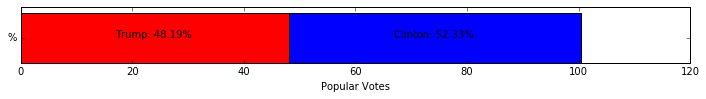

In [7]:
import old_statemap



bars.popular_vote(p)

#We couldn't get rid of the nans in our actual results dictionary, so we manually removed them in order to make the popular 
#bar charts work


#UPDATE: I figured out that the file we downloaded was corrupt for some lines, and fixed it by going straight to 538's sight
#instead. Our predictions should be able to display the results of our predictions.

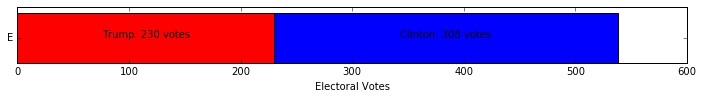

In [6]:
bars.electoral_vote(p)

----
# (10 points) Testing Code

Make sure your code is well tested.  Please include at least 3 testing setup you used to help test and validate your code for each section.  Include a print statement on what exactly each code is testing. 


I will be looking for completeness. Try to write at least one test for each function, class and each method in each class.  

Note, it may be easier for you to integrate your testing in the code generated in the above functions. Please make sure you clearly label all tests so your instructors can see what you are doing.  It may be helpful to use a keyword such as ##TEST##. 

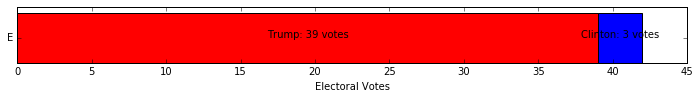

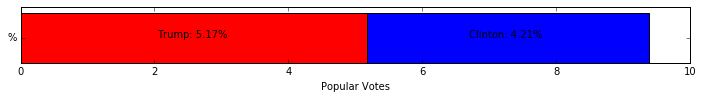

In [8]:
#Test the the visualization

test_dict = {'MI': (50,50), 'FL': (40, 60), 'AK':(75,25), 'WI':(10,20)}

bars.electoral_vote(test_dict)
bars.popular_vote(test_dict)


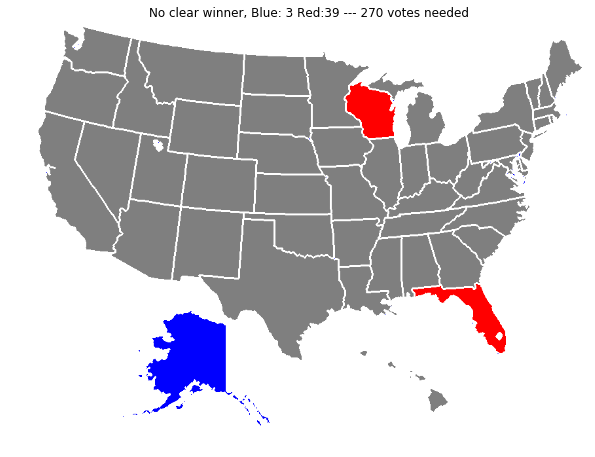

In [9]:
test2 = statemap.election(file, results = test_dict)
#feed in test dictionary results and display map

In [10]:
test3 = statemap.election.weigh(0,"lv",100000,"A+")
#testing what weighs our polls; this setup should yield 1, the highest value
print(test3)
test4 = statemap.election.weigh(20,"rv",10,"C")
#these inputs should give a really low weight
print(test4)

test_date = "10/31/2016"
print(statemap.election.delta_dates(test_date))
#testing "delta dates", which should give the number of days since the inputted dates

0.9999900000999989
0.015584415584415583
5


----
# (20 points) Final Presentation of model

On November 10th your group will present your model to the class.  Your group will be given a maximum of 10 minutes. Each member of the group is expected to explain their portion of the project.  

Please include any visualizations you would like to use in your git repository.  At the very least image files of your final predictions will likely be useful.  I will have each repository downloaded to my computer and ready for presentation.  I also recommend using a Jupyter notebook to organize your visualizations. 

----

### Turning in your homework

Now, you need to submit this assignment by uploading this jupyter notebook file to the course Desire2Learn web page. Instructors will use this file to motivate downloading of your git repository and grading of your homework. This means we will have two identical copies of this notebook (one in D2L and one in your git repository).  Each group must only submit one file to D2L.   

Don't forget to add your names in the first cell.  Turn in all files using the "Homework assignments" folder, find the dropbox link for "HW4-Election", and upload it there.